In [ ]:
import pandas as pd
import numpy as np
import random
import sys
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

#Clustering imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster import hierarchy
#SKLEARN CLUSTERING TOOLS: https://scikit-learn.org/stable/modules/clustering.html


In [ ]:
#Loading Data from train.csv file
df = pd.read_csv (r'/content/train_filtered.csv')
df = df.replace('Female',1)
df = df.replace('Male',-1)
df = df.replace(np.nan,0)
df = df.replace('Frontal',1)
df = df.replace('LL',-2)
df = df.replace('RL',-3)
df = df.replace('Lateral',-1)
df = df.replace('AP',1)
df = df.replace('PA',1)
df = df.replace('Unknown',0)
df = df.drop(labels=['Path','Sex','Age','Frontal/Lateral', 'AP/PA'], axis=1)
df.head()

scaler = StandardScaler()
model = scaler.fit(df)
data = model.transform(df)

S=df.shape
nrows = S[0]
ncols = S[1]
#print (df)



[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51938c8c50>


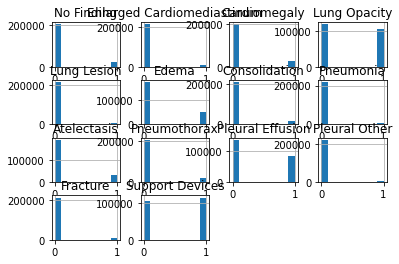

In [ ]:
# ------ VISUALIZE DATASET ------
print(df.hist())


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 3 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


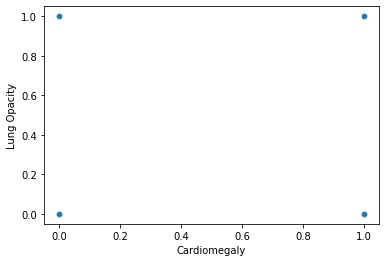

In [ ]:
# ------ GAUSSIAN MIXTURE CLUSTERING ------
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

mixt = GaussianMixture(n_components=100, covariance_type='full', max_iter=2, n_init=3).fit(df)
labels = (df).columns
# ------ VISUALIZE ------
sns.scatterplot(data=df, x=labels[2], y=labels[3])
plt.show()

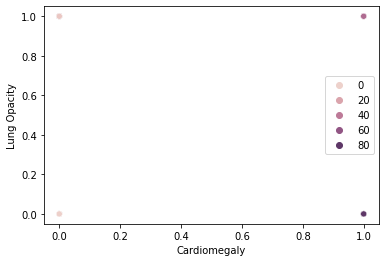

In [ ]:
# ------ MINIBATCH K-MEANS CLUSTERING ------
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

miniKmeans = MiniBatchKMeans(n_clusters=100, init='k-means++', random_state=0).fit(df)
labels = labels = (df).columns
# ------ VISUALIZE ------
sns.scatterplot(data=df, x=labels[2], y=labels[3], hue=miniKmeans.labels_)
plt.show()

In [ ]:
cl = AgglomerativeClustering(labels, lambda x,y: abs(x-y))
clusters = cl.getlevel(20)
frequency = [len(x) for x in clusters]
average = [1.0*sum(x)/len(x) for x in clusters]
plt.hist(average, bins=5)
plt.show()

TypeError: ignored

In [ ]:
plt.hist(df)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f51af8838c0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

miniKmeans = MeanShift( bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=2).fit(df)
labels = labels = (df).columns
# ------ VISUALIZE ------
sns.scatterplot(data=df, x=labels[2], y=labels[3])
plt.show()

In [ ]:
# ------ K-MEANS CLUSTERING ------
percent = 0.25;#How much of the dataset do we consider for clustering
dfsample = df.sample(n=int(nrows*percent))#There are 223,414 rows we take percent of them

kmeans = KMeans(n_clusters=100, init='k-means++', random_state=0).fit(df.drop('Path', axis=1))
labels = labels = (df).columns
# ------ VISUALIZE ------
sns.scatterplot(data=df, x=labels[2], y=labels[3], hue=kmeans.labels_)
plt.show()